In [1]:
from recognizer import *

## Funkcje pomocniczne do wczytywania obrazów

In [16]:
ocr = Recognizer()
example_path = 'data/sans/a.png'
image_path = 'data/sans/facebook.png'

#### Wczytywanie obrazu w trybie Integer (greyscale)

In [9]:
imageMat = ocr.readImage(example_path)
imageMat.shape

(57, 46)

#### Wyświetlanie obrazu

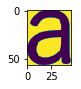

In [12]:
ocr.showImage(imageMat, 1)

#### Odwrócenie kolorów obrazu

In [13]:
imageMat = ocr.invertImage(imageMat)
imageMat.shape

(57, 46)

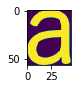

In [14]:
ocr.showImage(imageMat, 1)

## Przetwarzanie obrazu przed OCR

#### Obraz testowy

In [31]:
text = text = 'facebook ceo mark zuckerberg on thursday said his annual personal challenge this year will be tacking abuse, hate, foreign interference, and other major problems on facebook. in essence his 2018 will be dedicated to fixing a mess that mightve been prevented with a little more foresight by the social giant. its a departure from previous challenges, many of which have been more ligthhearted.'

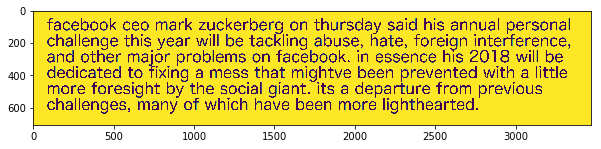

In [25]:
image = ocr.readImage(image_path)
ocr.showImage(image, 10)

#### Przykładowe dopasowanie litery do obrazu testowego

In [42]:
letterImage = ocr.fontImages['a']
correlationMatrix = ocr.correlateLetter(ocr.image, letterImage, 254, threshold=0.85)
letterPosition = ocr.getLetterPositions(correlationMatrix, letterImage)
print("Dopasowane litery a :",len(letterPosition))
print("Liczba wystąpień a w tekscie : ", text.count('a'))


Dopasowane litery a : 27
Liczba wystąpień a w tekscie :  27


#### Usunięcie dopasowaniej litery przed przetworzeniem następnej

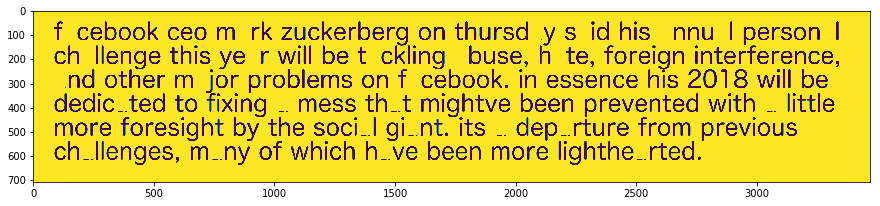

In [44]:
letterImage = ocr.fontImages['a']
correlationMatrix = ocr.correlateLetter(ocr.image, letterImage, 254, threshold=0.85)
letterPosition = ocr.getLetterPositions(correlationMatrix, letterImage)
ocr.removeLetter('a', letterPosition)
ocr.showImage(ocr.image, 15)

## Problemy z naiwnym przetwarzaniem kolejnych liter

* Obrazy niektórych liter zawierają się w innych literach
    ```'c' zawiera się w 'b', 'd', 'e' ...```
    
## Rozwiązanie

* Przed przetworzeniem obrazu, należy policzyć liczbę dopasowań pojedyńczej litery
* Ustawić litery w kolejności rosnącej ilości dopasowań

```
[('x', 1),
 ('z', 1),
 ('w', 4),
 ('y', 4),
 ('j', 7),
 ('f', 8),
 ('v', 8),
 ('k', 9),
 ('g', 10),
 ('p', 11),
 ('d', 12),
 ('m', 13),
 ('b', 14),
 ('n', 21),
 ('u', 21),
 ('h', 26),
 ('a', 27),
 ('t', 28),
 ('i', 30),
 ('q', 32),
 ('r', 34),
 ('l', 39),
 ('o', 41),
 ('s', 45),
 ('e', 51),
 ('c', 63)]
                     ```
                     
* Dodatkowo dla każdej litery dobieram indywidualnie ```threshold```

```corrCoefficient = 5 * element[1] / self.maxf / 100```

``` ocr.correlateLetter(ocr.image, letterImage, 254, threshold=0.8 + corrCoefficient)```

## Właściwe dopasowanie liter

In [47]:
def matchAllLetters(self):
    for element in self.orderAndFreq:
        letter = element[0]
        letterImage = self.fontImages[letter]
        corrCoefficient = 5 * element[1] / self.maxf / 100
        correlation = self.correlateLetter(self.image, letterImage, 254, threshold=0.8 + corrCoefficient)
        self.lettersPositions[letter] = self.getLetterPositions(correlation, letterImage)
        self.removeLetter(letter, self.lettersPositions[letter])

## Stworzenie tekstu na podstawie dopasowanych pozycji liter